In [9]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun
from astropy import units as u
from astropy.time import Time

%matplotlib inline

c_j2000 = SkyCoord('19h59m28.3566s', '+40d44m02.096s', frame='icrs')
iitk_loc = EarthLocation(lat=26.5123*u.deg, lon=80.2329*u.deg, height=125*u.m)

QUESTION 1: RA and Dec Change Due to Precession

In [12]:


RA_deg = (19 + 59/60 + 28.3566/3600) * 15
DEC_deg = 40 + 44/60 + 2.096/3600

years = datetime.now().year - 2000
ra_now = RA_deg + (3.07 * years / 3600) * 15  # RA shift
dec_now = DEC_deg + (20 * years / 3600)      # Dec shift
now=Time.now()
print(f"J2000 Coordinates: RA {RA_deg:.4f}°, Dec {DEC_deg:.4f}°")
print(f"Approximate Coordinates Today: RA {ra_now:.4f}°, Dec {dec_now:.4f}°")

J2000 Coordinates: RA 299.8682°, Dec 40.7339°
Approximate Coordinates Today: RA 300.2007°, Dec 40.8784°


QUESTION 2: Azimuth and Elevation at IIT Kanpur

In [13]:
def get_alt_az(ra, dec, lat, lon, dt):
    j2000 = datetime(2000, 1, 1, 12, 0, 0)
    days = (dt - j2000).total_seconds() / 86400.0
    gst = (18.69737 + 24.06571 * days) % 24
    lst_deg = ((gst + lon / 15.0) % 24) * 15
    
    ha = np.radians((lst_deg - ra) % 360)
    phi, delta = np.radians(lat), np.radians(dec)
    
    alt = np.arcsin(np.sin(delta)*np.sin(phi) + np.cos(delta)*np.cos(phi)*np.cos(ha))
    az = np.arccos((np.sin(delta) - np.sin(alt)*np.sin(phi)) / (np.cos(alt)*np.cos(phi)))
    if np.sin(ha) > 0: az = 2*np.pi - az
    return np.degrees(alt), np.degrees(az)

lat_iitk, lon_iitk = 26.5123, 80.2329
alt, az = get_alt_az(RA_deg, DEC_deg, lat_iitk, lon_iitk, datetime.utcnow())
print(f"Current Position at IITK: Elevation = {alt:.2f}°, Azimuth = {az:.2f}°")

Current Position at IITK: Elevation = -22.66°, Azimuth = 3.16°


QUESTION 3: Polar Plot of the Diurnal Path

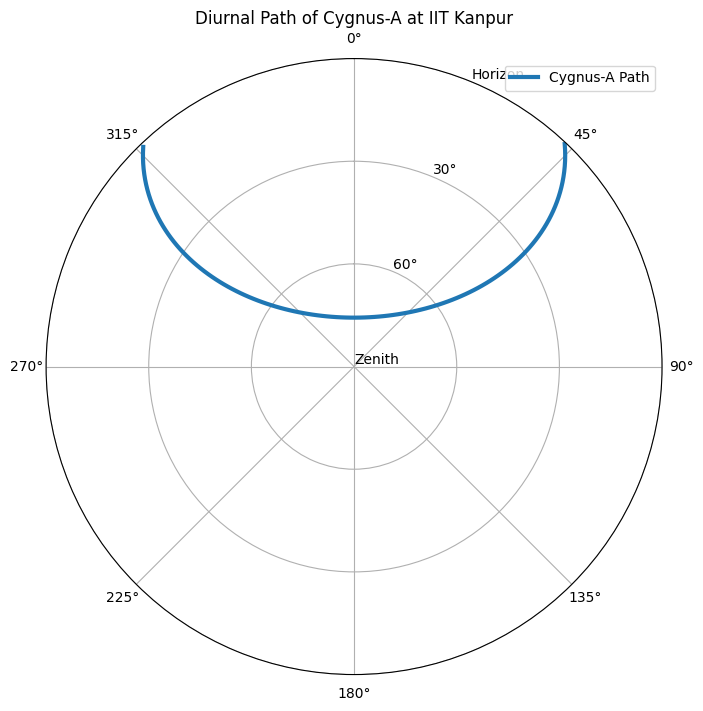

In [14]:
times_24h = now + np.linspace(0, 24, 200)*u.hour
altaz_24h = c_j2000.transform_to(AltAz(obstime=times_24h, location=iitk_loc))

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.set_theta_direction(-1) # Clockwise
ax.set_theta_zero_location('N') # North at top

mask = altaz_24h.alt.deg > 0
ax.plot(altaz_24h.az.rad[mask], 90 - altaz_24h.alt.deg[mask], lw=3, label='Cygnus-A Path')

ax.set_rmax(90)
ax.set_rticks([0, 30, 60, 90])
ax.set_yticklabels(['Zenith', '60°', '30°', 'Horizon'])
plt.title("Diurnal Path of Cygnus-A at IIT Kanpur")
plt.legend()
plt.show()

QUESTION 4: Yearly Change (Sun vs. Cygnus)

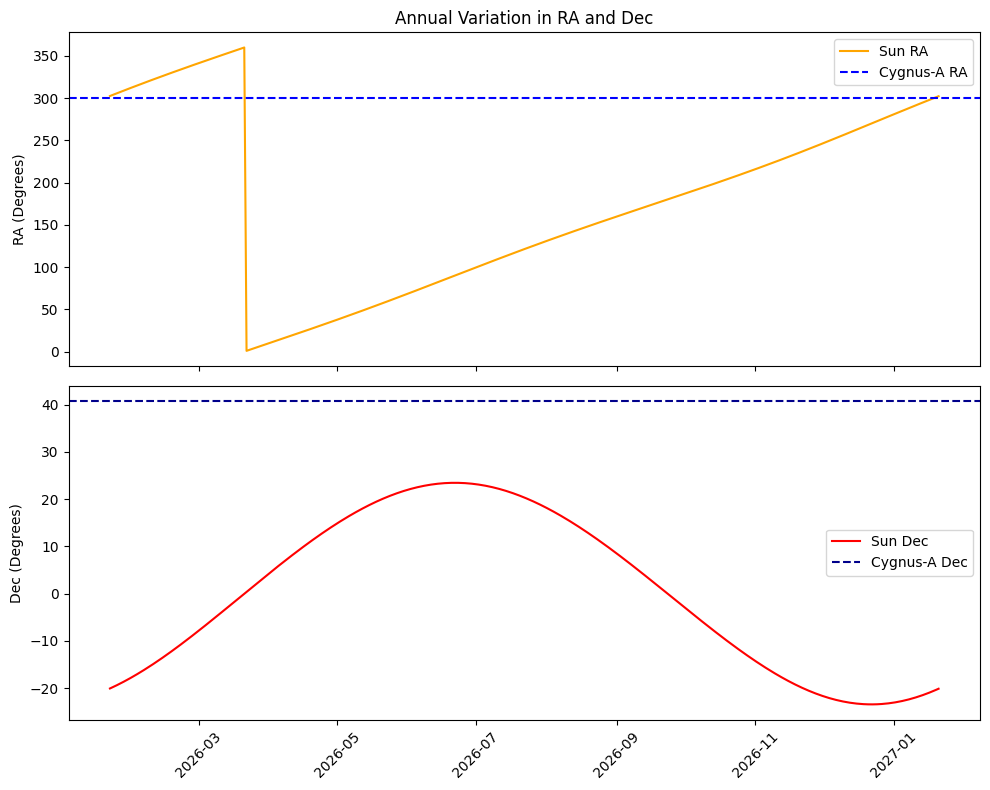

In [15]:
times_year = now + np.linspace(0, 365, 365)*u.day
sun_coords = get_sun(times_year)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

ax1.plot(times_year.datetime, sun_coords.ra.deg, color='orange', label='Sun RA')
ax1.axhline(y=c_j2000.ra.deg, color='blue', linestyle='--', label='Cygnus-A RA')
ax1.set_ylabel("RA (Degrees)")
ax1.set_title("Annual Variation in RA and Dec")
ax1.legend()

ax2.plot(times_year.datetime, sun_coords.dec.deg, color='red', label='Sun Dec')
ax2.axhline(y=c_j2000.dec.deg, color='darkblue', linestyle='--', label='Cygnus-A Dec')
ax2.set_ylabel("Dec (Degrees)")
ax2.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()